# Predicting Diabetes Patients using Logistic Regression

As the title suggests, this program is an end-to-end example of solving a real-world problem using Data Science. We’ll be using Machine Learning to predict whether a person has diabetes or not, based on information about the patient such as blood pressure, body mass index (BMI), age, etc.

The data was collected and made available by “National Institute of Diabetes and Digestive and Kidney Diseases” as part of the Pima Indians Diabetes Database. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here belong to the Pima Indian heritage (subgroup of Native Americans), and are females of ages 21 and above.

We’ll be using Python and some of its popular data science related packages. First of all, we will import **pandas** to read our data from a CSV file and manipulate it for further use. We will also use **numpy** to convert out data into a format suitable to feed our classification model. We’ll use **seaborn** and **matplotlib** for visualizations. We will then import Logistic Regression algorithm from **sklearn**. This algorithm will help us build our classification model. Lastly, we will use **pickle** to save our model for future use.

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scikitplot as skl
sns.set()

## Data Description

We have our data saved in a CSV file called **diabetes.csv**. We first read our dataset into a pandas dataframe called **data**, and then use the **head()** function to show the first five records from our dataset.

In [6]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


The following features have been provided to help us predict whether a person is diabetic or not:

**Pregnancies:** Number of times pregnant

**Glucose:** Plasma glucose concentration over 2 hours in an oral glucose tolerance test

**BloodPressure:** Diastolic blood pressure (mm Hg)

**SkinThickness:** Triceps skin fold thickness (mm)

**Insulin:** 2-Hour serum insulin (mu U/ml)

**BMI:** Body mass index (weight in kg/(height in m)2)

**DiabetesPedigreeFunction:** Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)

**Age:** Age (years)

**Outcome:** Class variable (0 if non-diabetic, 1 if diabetic)

In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Count of all the values in a columns is same. So, there is no missing values in the Dataset.

## Checking Data Distribution

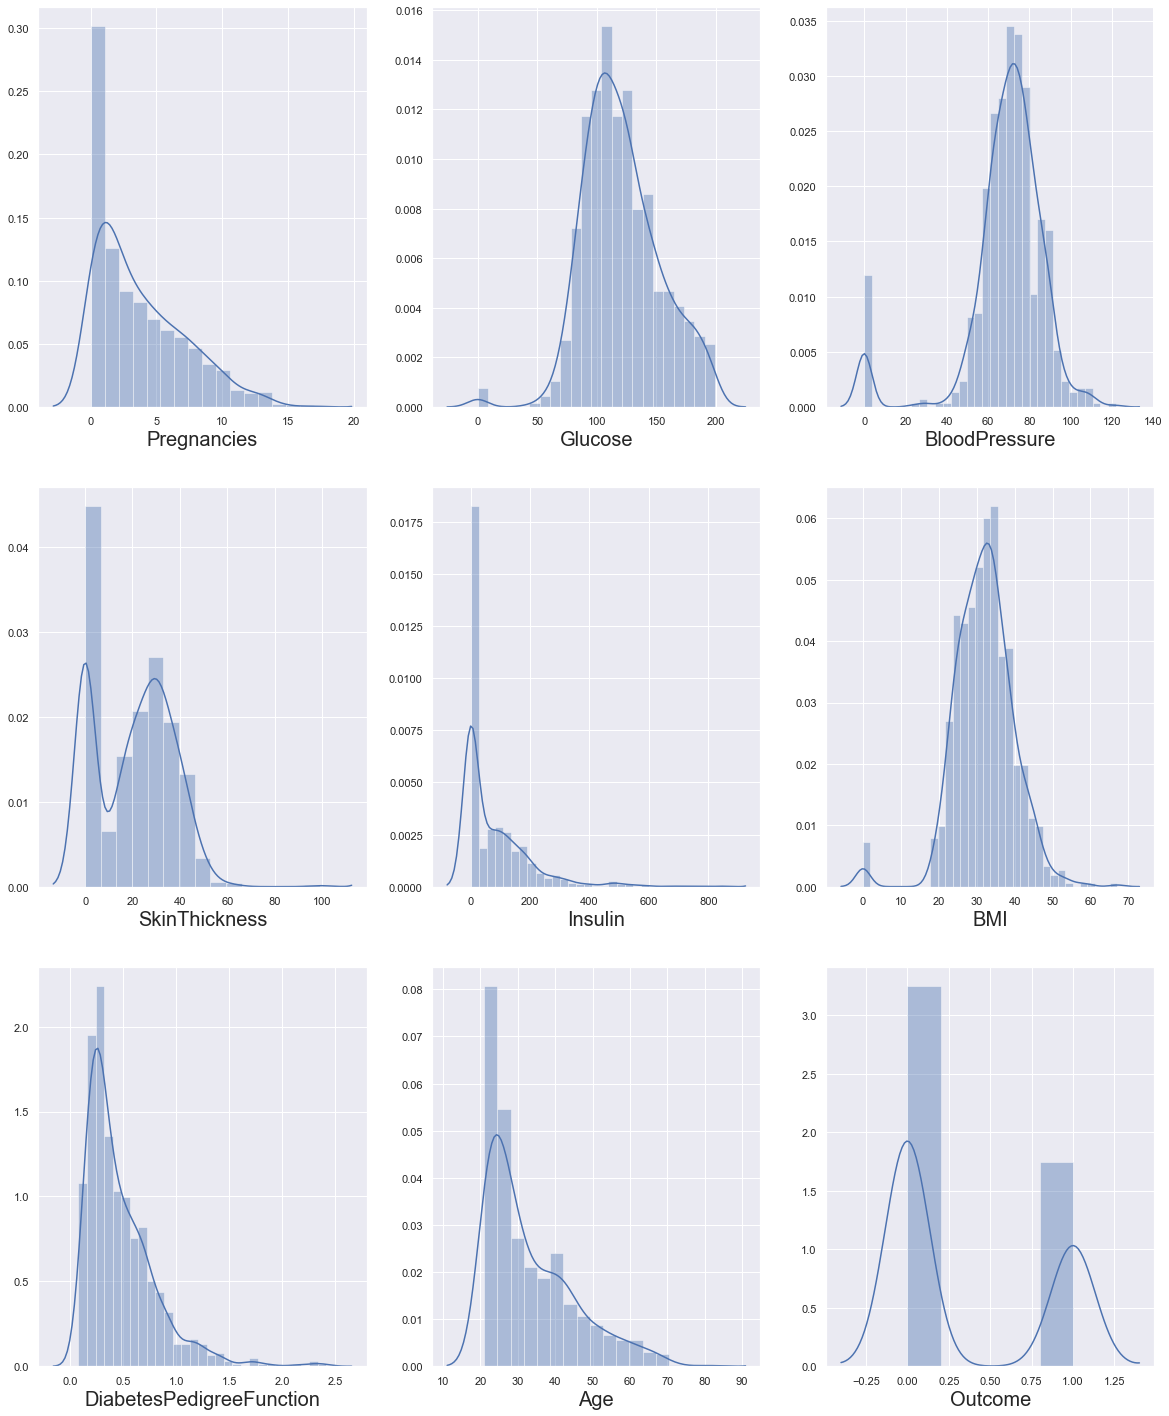

In [9]:
plt.figure(figsize=(20,25), facecolor = 'white')
plotnumber = 1

for column in data:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

There is skewness in the dataset.

Also, we can see there is few data for columns Glucose, BloodPressure, SkinThickness, Insulin, BMI have values as 0. But in the real life these values cannot be 0. This type of issues comes in a dataset due to manual errors in data capture. We can resolve this either by removing these records or by replacing it by mean, median or mode etc. We will apply a mean logic, since the variance in dataset does not seems to be very high, so mean should work.

In [10]:
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())

Lets see the distribution again

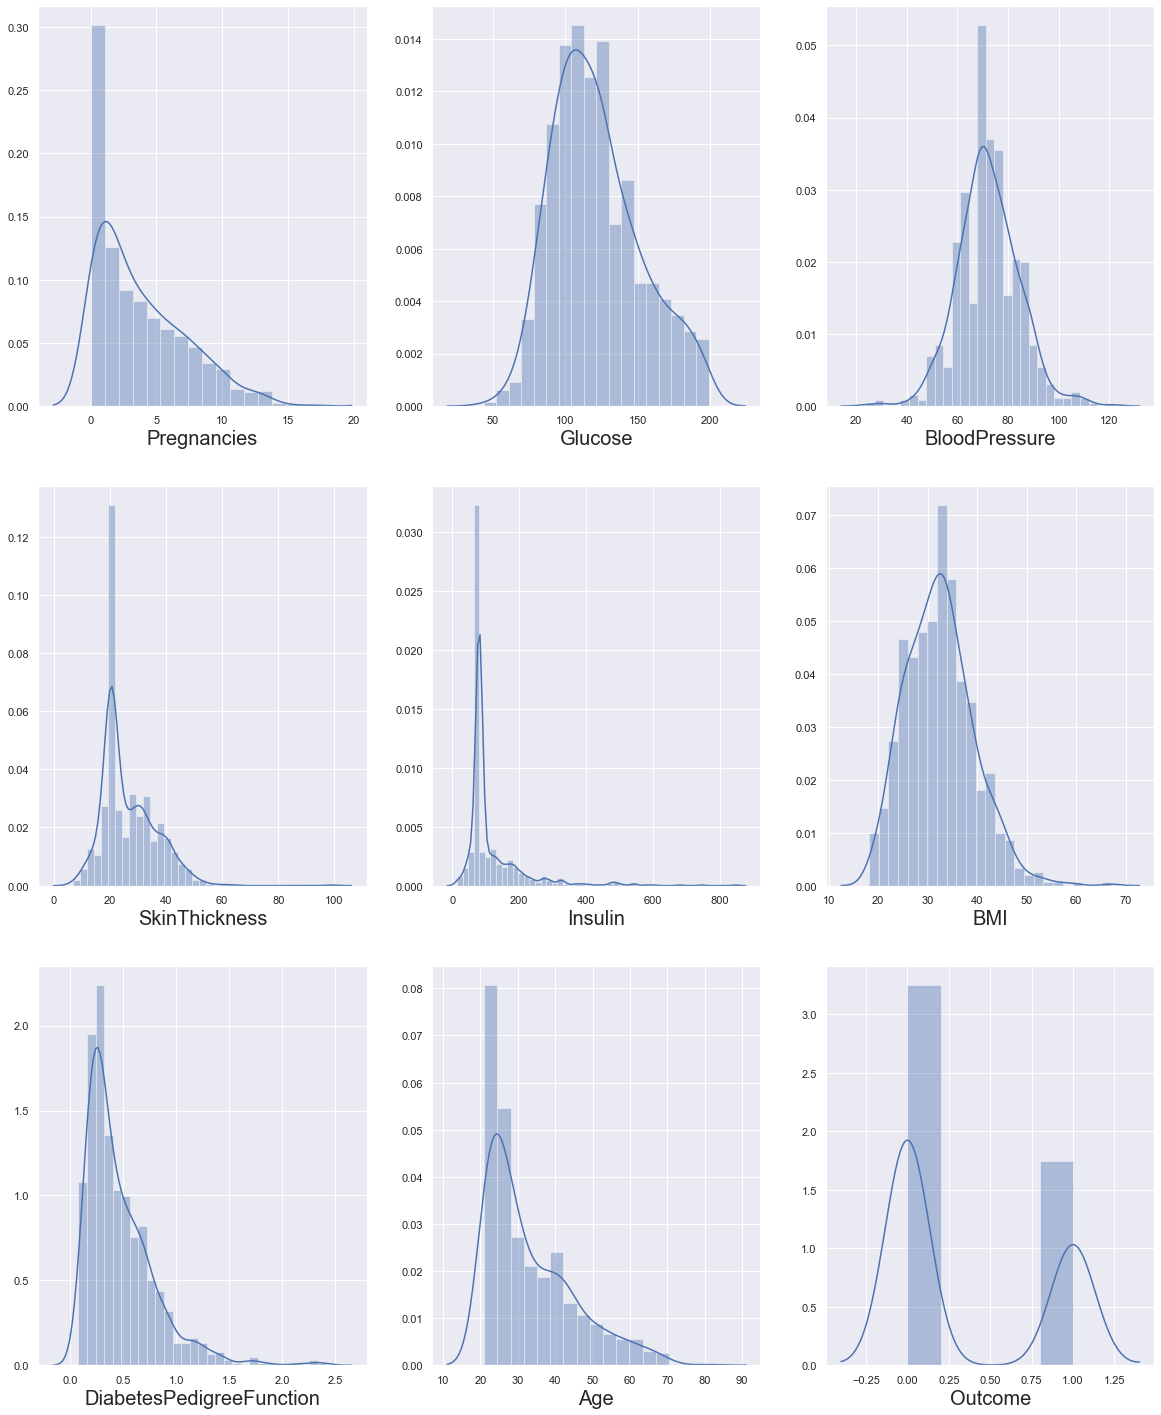

In [11]:
plt.figure(figsize=(20,25), facecolor = 'white')
plotnumber = 1

for column in data:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

Now, checking if there is outliers in the dataset

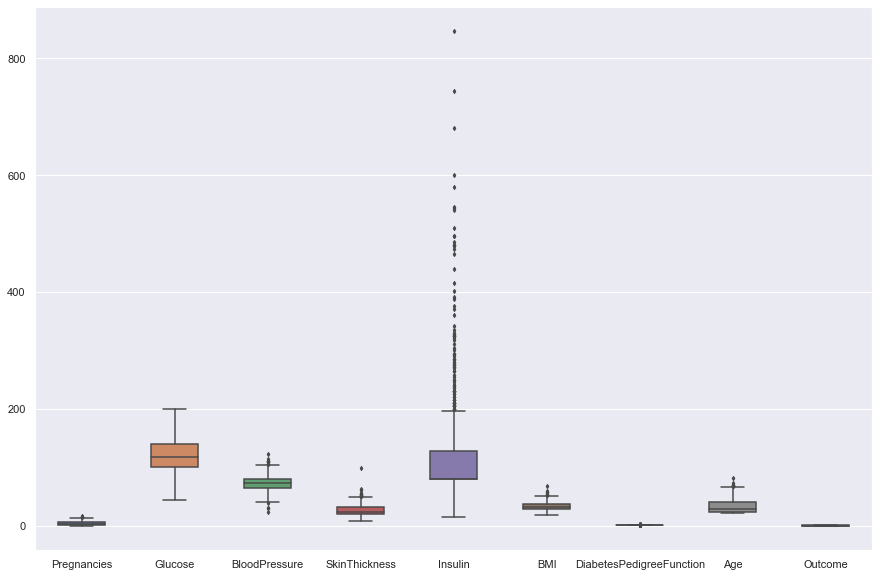

In [12]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data,width= 0.5,ax=ax, fliersize=3)

In [13]:
q= data['Pregnancies'].quantile(0.98)
# we are removing top 2% of data from the Pregnancies column
data_cleaned = data[data['Pregnancies'] < q]

q= data['SkinThickness'].quantile(0.99)
# we are removing top 1% of data from the SkinThickness column
data_cleaned = data[data['SkinThickness'] < q]

q= data['Insulin'].quantile(0.95)
# we are removing top 5% of data from the Insulin column
data_cleaned = data[data['Insulin'] < q]

q= data['BMI'].quantile(0.99)
# we are removing top 1% of data from the BMI column
data_cleaned = data[data['BMI'] < q]

q= data['DiabetesPedigreeFunction'].quantile(0.99)
# we are removing top 1% of data from the DiabetesPedigreeFunction column
data_cleaned = data[data['DiabetesPedigreeFunction'] < q]

q= data['Age'].quantile(0.99)
# we are removing top 1% of data from the Age column
data_cleaned = data[data['Age'] < q]

In [14]:
data_cleaned.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [15]:
data_cleaned.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000
mean,3.831357,121.604048,72.206306,26.665377,119.147048,32.494764,0.471219,32.805007,0.350461
std,3.373499,30.357286,12.154978,9.662650,93.520628,6.873584,0.332522,11.113182,0.477429
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.500000,64.000000,20.536458,79.799479,27.600000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.370000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,129.500000,36.600000,0.625000,40.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,66.000000,1.000000


Checking if there is any NaN values in the new 

In [16]:
data_cleaned.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

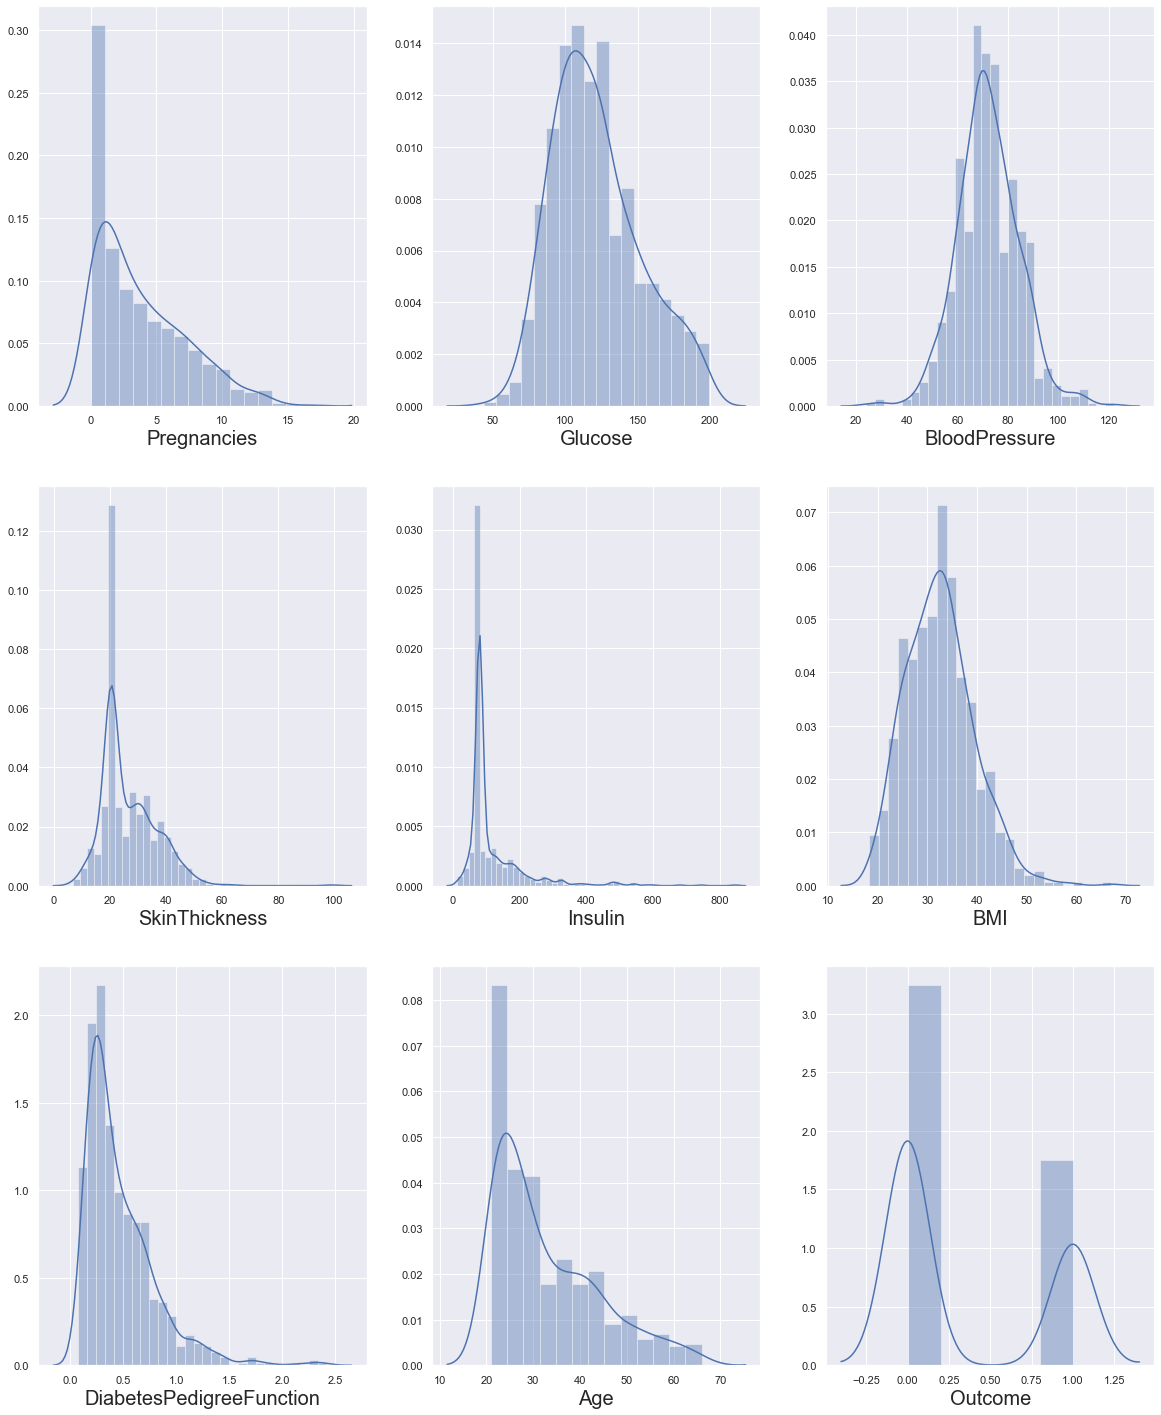

In [17]:
plt.figure(figsize=(20,25), facecolor = 'white')
plotnumber = 1

for column in data:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The Data looks much better now. We will start or analysis now, further preprocessing might result in importatnt data loss. If the our model doesn't perform well then we will come again for further preprocessing.

In [18]:
X= data_cleaned.drop(columns=['Outcome'])
y= data_cleaned['Outcome']

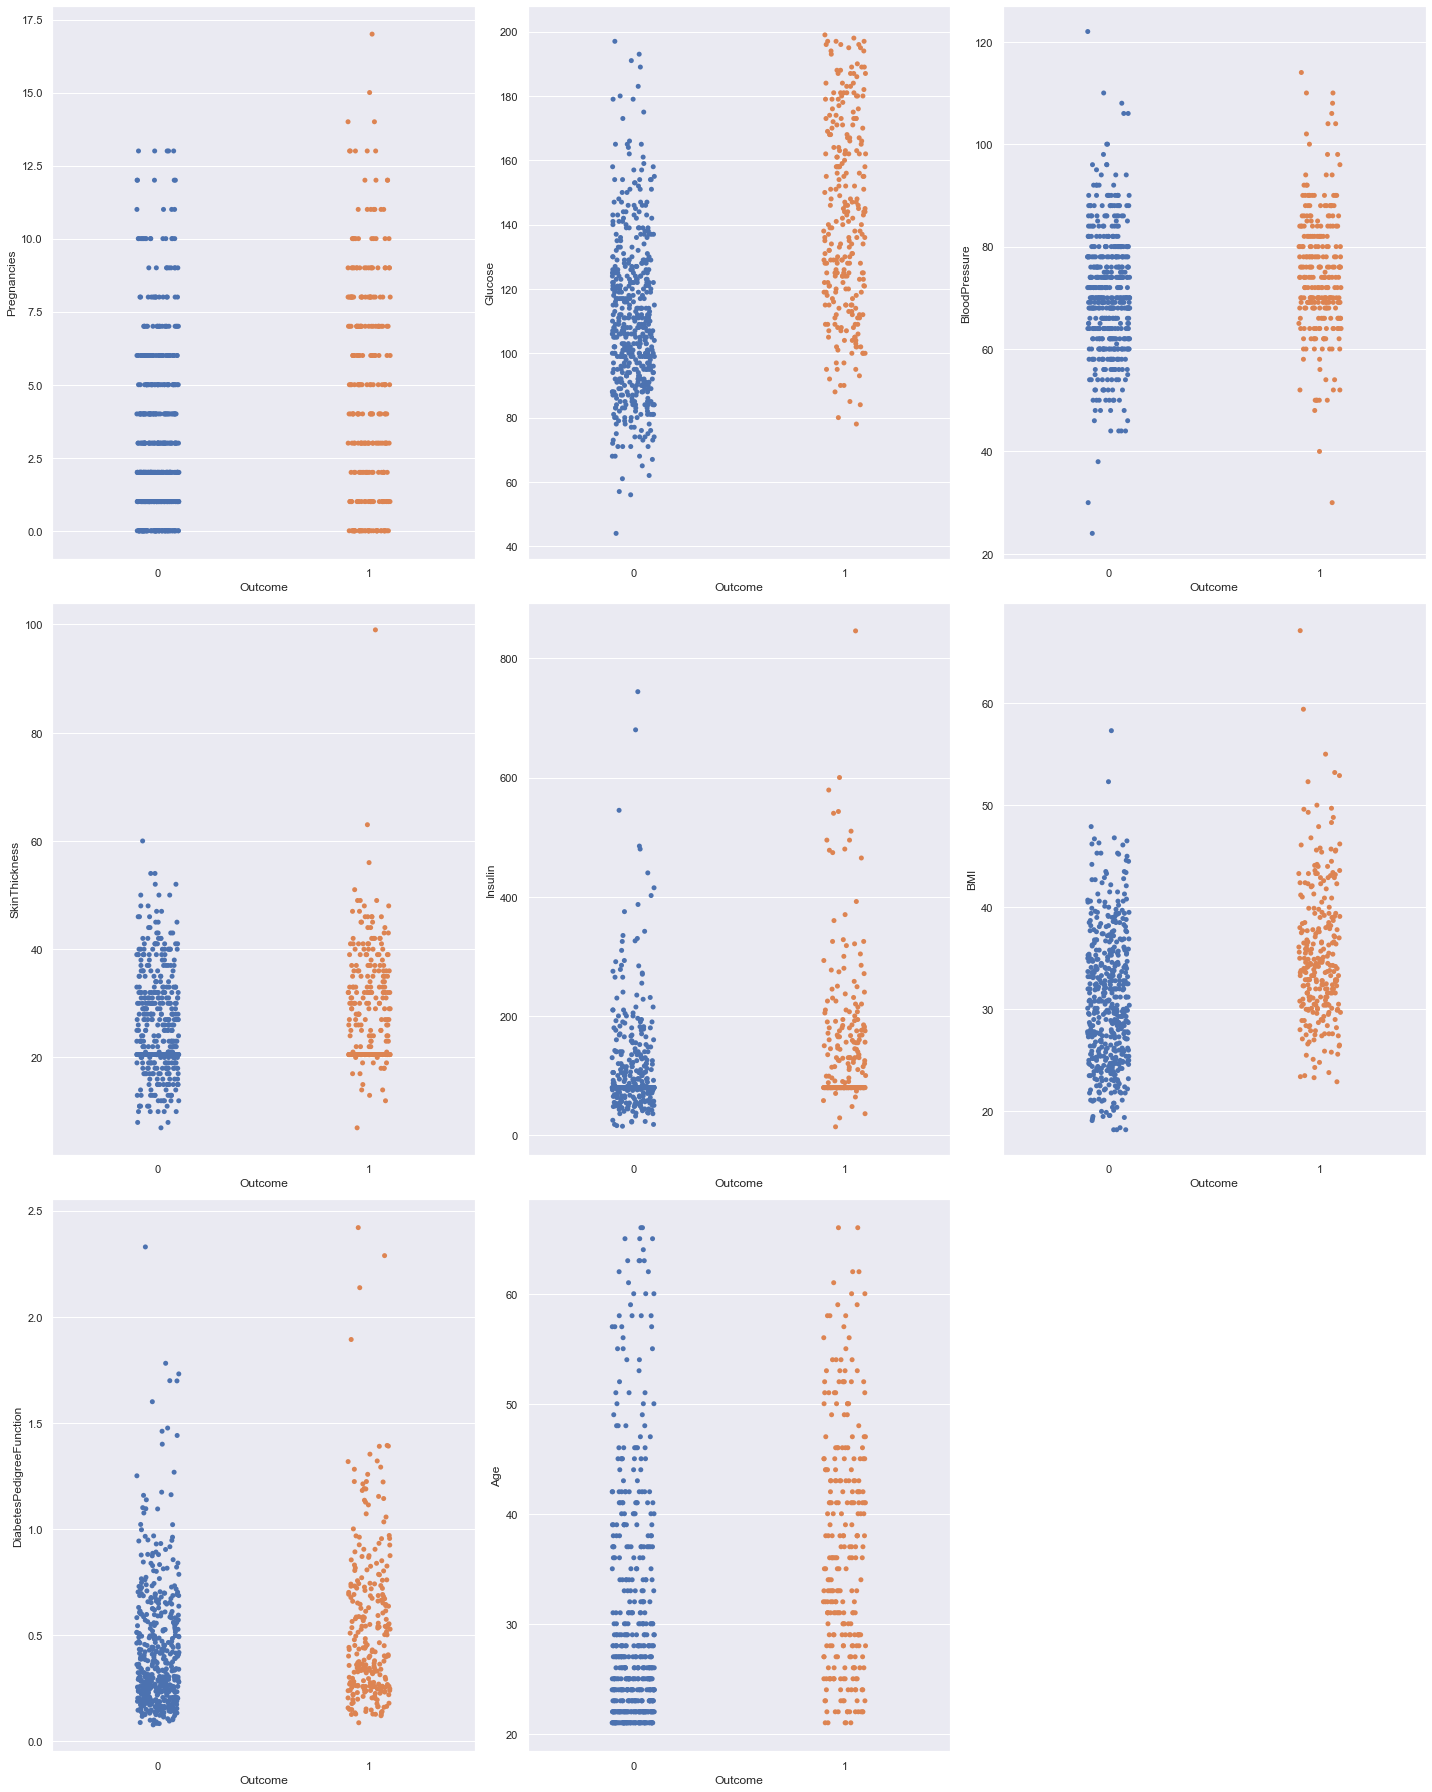

In [19]:
#Let's see how the data is distributed for each column
plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber =1

for column in X:
    if plotnumber <= 8:
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

Now, we will start with checking MultiCollinearity in the independent variables. Before that, we should scale our data.  

In [20]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

This is how our data looks after scaling.

In [21]:
X_scaled

array([[ 0.64327075,  0.87008298, -0.01698412, ...,  0.16090077,
         0.46879263,  1.54828125],
       [-0.83984741, -1.20656984, -0.51093456, ..., -0.85816238,
        -0.36177415, -0.16252742],
       [ 1.23651801,  2.02377899, -0.6755847 , ..., -1.33857787,
         0.60421113, -0.07248486],
       ...,
       [ 0.34664712, -0.01991109, -0.01698412, ..., -0.91639456,
        -0.68075995, -0.25256998],
       [-0.83984741,  0.14490263, -1.00488499, ..., -0.3486308 ,
        -0.36779275,  1.27815356],
       [-0.83984741, -0.9428679 , -0.18163427, ..., -0.30495667,
        -0.47010895, -0.88286791]])

In [22]:
type(X_scaled)

numpy.ndarray

In [23]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['Features'] = X.columns

vif

,vif,Features
0,1.484572,Pregnancies
1,1.354580,Glucose
2,1.247898,BloodPressure
3,1.455095,SkinThickness
4,1.264776,Insulin
5,1.551161,BMI
6,1.058847,DiabetesPedigreeFunction
7,1.680199,Age


All the VIF values are less than 5 and arevery low. That means no multicollinearity. Now, we can go ahead with fitting our data to model. Before that lets, split our data in test and training set.

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = 355 )

In [25]:
#print('x_train <%d>',x_train.count_nonzero())

## Training the Logistic Regression Machine Learning Model

We can now train our classification model. We’ll be using a machine simple learning model called logistic regression. Since the model is readily available in sklearn, the training process is quite easy and we can do it in few lines of code. First, we create an instance called log_reg and then use the fit function to train the model.

In [26]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [27]:
y_pred = log_reg.predict(x_test)

**Next, we will use our test data to find out accuracy of the model.**

In [28]:
# Calculating Accuracy Score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7631578947368421

In [29]:
# Populating Confusion Matrix
conf_mat= confusion_matrix(y_test,y_pred)
conf_mat

array([[106,  17],
       [ 28,  39]], dtype=int64)

In [30]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [31]:
# Calculating Precision Score
Precision = true_positive/(true_positive+false_positive)
Precision

0.8617886178861789

In [32]:
# Calculating Recall Score
Recall = true_positive/(true_positive+false_negative)
Recall

0.7910447761194029

In [33]:
# Calculating F1-Score Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8249027237354086

## Interpreting the ML Model

To get a better sense of what is going on inside the logistic regression model, we can visualize how our model uses the different features and which features have greater effect.

Text(0.5, 0, 'Importance')

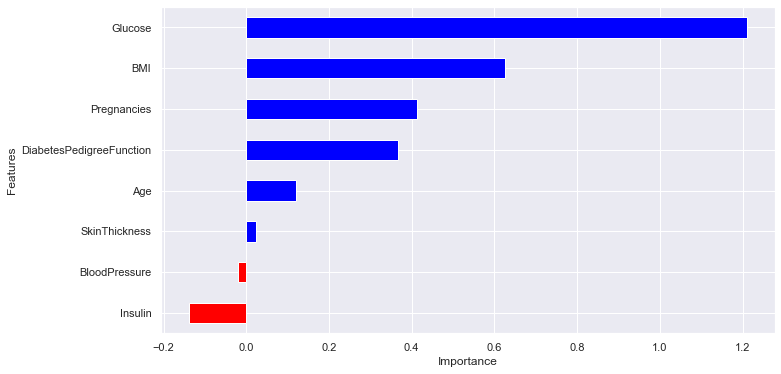

In [34]:
coeff = list(log_reg.coef_[0])
labels = list(X.columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

From the above figure, we can draw the following conclusions.

1. Glucose level, BMI, pregnancies and diabetes pedigree function have significant influence on the model, specially glucose level and BMI. It is good to see our machine learning model match what we have been hearing from doctors our entire lives!

2. Blood pressure has a negative influence on the prediction, i.e. higher blood pressure is correlated with a person not being diabetic. (also, note that blood pressure is more important as a feature than age, because the magnitude is higher for blood pressure).

3. Although age was more correlated than BMI to the output variables (as we saw during data exploration), the model relies more on BMI. This can happen for several reasons, including the fact that the correlation captured by age is also captured by some other variable, whereas the information captured by BMI is not captured by other variables.

Note that this above interpretations require that our input data is normalized. Without that, we can’t claim that importance is proportional to weights.

## Saving the Model

Now we will save our trained model for future use using **pickle**

In [35]:
import pickle
# Creating different model files in binary format
with open('modelForPredicition.sav','wb') as f:
    pickle.dump(log_reg,f)
    
with open('standardScalar.sav','wb') as f:
    pickle.dump(scalar,f)